In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset, on city
pyber_df = city_df.merge(ride_df, how='outer', on='city')

pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [115]:
#Create Dataframe to use for the Scatter Plot

grouped_cities = pyber_df.groupby(['city'])

total_rides = grouped_cities["ride_id"].count()
average_fare = grouped_cities["fare"].mean()
driver_count = grouped_cities["driver_count"].mean()
citytype=grouped_cities["type"].first()


ride_sharing_df = pd.DataFrame({"Total Number of Rides (per city)": total_rides,
                                "Average Fare ($)": average_fare,
                                "Driver Count (per city)":driver_count,
                                "Type":citytype})
ride_sharing_df.head()

,Total Number of Rides (per city),Average Fare ($),Driver Count (per city),Type
city,,,,
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


In [138]:
#Create DataFrame to use for the Pie Charts

grouped_types = ride_sharing_df.groupby(['Type'])

type_total_rides = grouped_types["Total Number of Rides (per city)"].sum()
type_average_fare = grouped_types["Average Fare ($)"].sum()
type_driver_count = grouped_types["Driver Count (per city)"].sum()

piechart_df = pd.DataFrame({"Total Number of Rides (per city)": type_total_rides,
                                "Average Fare ($)": type_average_fare,
                                "Driver Count (per city)":type_driver_count})
piechart_df.head()

,Total Number of Rides (per city),Average Fare ($),Driver Count (per city)
Type,,,
Rural,125,623.479771,78
Suburban,625,1106.542729,490
Urban,1625,1616.942033,2405


## Bubble Plot of Ride Sharing Data

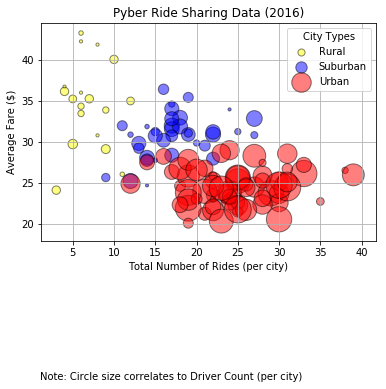

In [112]:
#Rural = yellow
plt.scatter(ride_sharing_df[ride_sharing_df['Type'] == 'Rural']['Total Number of Rides (per city)'], 
                ride_sharing_df[ride_sharing_df['Type'] == 'Rural']["Average Fare ($)"], 
                s = ride_sharing_df[ride_sharing_df['Type'] == 'Rural']["Driver Count (per city)"]*10, 
                alpha=0.5, label="Rural", edgecolor ='black', color="yellow")

#Suburban = blue
plt.scatter(ride_sharing_df[ride_sharing_df['Type'] == 'Suburban']['Total Number of Rides (per city)'], 
                ride_sharing_df[ride_sharing_df['Type'] == 'Suburban']["Average Fare ($)"], 
                s = ride_sharing_df[ride_sharing_df['Type'] == 'Suburban']["Driver Count (per city)"]*10, 
                alpha=0.5, label="Suburban", edgecolor ='black', color="blue")

#Urban = red
plt.scatter(ride_sharing_df[ride_sharing_df['Type'] == 'Urban']['Total Number of Rides (per city)'], 
                ride_sharing_df[ride_sharing_df['Type'] == 'Urban']["Average Fare ($)"], 
                s = ride_sharing_df[ride_sharing_df['Type'] == 'Urban']["Driver Count (per city)"]*10, 
                alpha=0.5, label="Urban", edgecolor ='black', color="red")

#Chart elements
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel("Average Fare ($)")
plt.text(1,1,'Note: Circle size correlates to Driver Count (per city)')
plt.legend(title='City Types',fancybox=True)
plt.grid(True)

#Save and print
plt.savefig("Pyber_Ride_Sharing_Scatter.png")
plt.show()

## Total Fares by City Type

In [139]:
piechart_df['Rides(%)']=(piechart_df['Total Number of Rides (per city)']/piechart_df['Total Number of Rides (per city)'].sum())*100
piechart_df['Fares(%)']=(piechart_df['Average Fare ($)']/piechart_df['Average Fare ($)'].sum())*100
piechart_df['Drivers(%)']=(piechart_df['Driver Count (per city)']/piechart_df['Driver Count (per city)'].sum())*100

In [140]:
piechart_df.head()

,Total Number of Rides (per city),Average Fare ($),Driver Count (per city),Rides(%),Fares(%),Drivers(%)
Type,,,,,,
Rural,125,623.479771,78,5.263158,18.628216,2.623613
Suburban,625,1106.542729,490,26.315789,33.061083,16.481668
Urban,1625,1616.942033,2405,68.421053,48.310701,80.894719


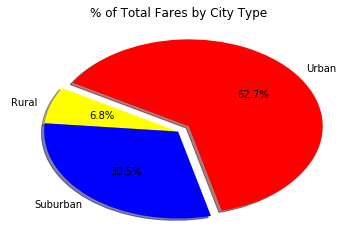

In [131]:
plt.pie(piechart_df['Average Fare ($)'], explode=[0,0,0.1], labels=['Rural','Suburban','Urban'], colors=['yellow','blue','red'],
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.savefig("Fares_piechart.png")
plt.show()


## Total Rides by City Type

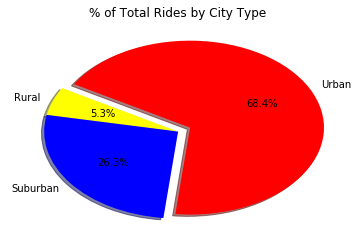

In [133]:
plt.pie(piechart_df['Total Number of Rides (per city)'], explode=[0,0,0.1], labels=['Rural','Suburban','Urban'], colors=['yellow','blue','red'],
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
plt.savefig("Rides_piechart.png")
plt.show()

## Total Drivers by City Type

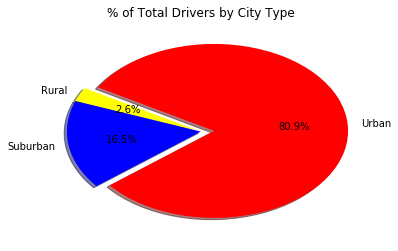

In [141]:
plt.pie(piechart_df['Driver Count (per city)'], explode=[0,0,0.1], labels=['Rural','Suburban','Urban'], colors=['yellow','blue','red'],
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
plt.savefig("Drivers_piechart.png")
plt.show()